In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from numpy.linalg import eig
plt.style.use("ggplot")

data_dir = Path.home() 
FPP_model_file = data_dir / "astro_environment" / "FPP.model.txt"
FPP_file = data_dir / "astro_environment" / "FPP.txt"

Creating FPP_model and FPP dataframes

In [2]:
with open(FPP_model_file) as f:    
    FPP_model_list = f.readlines()
data_guide = FPP_model_list[:11]
FPP_model_lines = FPP_model_list[11:]

for line in data_guide:
    print(line, end="")

FPP_model_data_vals = list()
for line in FPP_model_lines:
    FPP_model_data_vals.append(line.strip().split())
FPP_model = pd.DataFrame(data=FPP_model_data_vals[1:], columns=FPP_model_data_vals[0], dtype=float)
FPP_model

#galaxy=Primary Host Galaxy
#sersic=Sersic index
#mgal=Mass of Galaxy in solar masses
#rho0=central density in solar masses per parsec^3
#reff=effective radius in kpc
#voversigma=ratio of rotation velocity to velocity dispersion
#mnsc=Mass of nuclear star cluster in units of solar masses
#rnsc=(half mass?) radius of nuclear star cluster in parsec
#mbh=mass of primary black hole in units of solar masses
#rinfl=radius of influence in parsec
#rhoinfl=density at the radius of influence in solar masses/pc^3


C:\Users\isaia\AppData\Local\Temp\ipykernel_8828\1258746840.py:12: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  FPP_model = pd.DataFrame(data=FPP_model_data_vals[1:], columns=FPP_model_data_vals[0], dtype=float)


,galaxy,sersic,mgal,rho0,reff,voversigma,mnsc,rnsc,mbh,rinfl,rhoinfl
0,NGC2639r,3.34,7.200000e+11,10000.0,5.630,0.50,0.0,0.0,1.700000e+09,130.00,290.0
1,NGC2639pq4,3.34,7.200000e+11,10000.0,5.630,0.50,0.0,0.0,1.700000e+09,130.00,290.0
2,NGC2639p,3.34,7.200000e+11,10000.0,5.630,0.50,0.0,0.0,1.700000e+09,130.00,290.0
3,NGC6958r,3.30,3.600000e+10,1000.0,2.590,0.50,0.0,0.0,3.600000e+08,160.00,18.0
4,NGC6958p,3.30,3.600000e+10,1000.0,2.590,0.50,0.0,0.0,3.600000e+08,160.00,18.0
5,MWp,1.32,9.600000e+09,10000000.0,1.000,0.60,40000000.0,4.2,4.000000e+06,1.20,260000.0
6,MWrq4,1.32,9.600000e+09,10000000.0,1.000,0.60,40000000.0,4.2,4.000000e+06,1.20,260000.0
7,MWpq4,1.32,9.600000e+09,10000000.0,1.000,0.60,40000000.0,4.2,4.000000e+06,1.20,260000.0
8,M32rq4,1.60,1.040000e+09,10000000.0,0.180,0.70,14500000.0,4.4,2.500000e+06,1.61,65000.0
9,M32pq4,1.60,1.040000e+09,10000000.0,0.180,0.70,14500000.0,4.4,2.500000e+06,1.61,65000.0


In [3]:
with open(FPP_file) as f2:    
    FPP_list = f2.readlines()

data_guide = FPP_list[1:11]
FPP_lines = FPP_list[11:29]

for line in data_guide:
    print(line, end="")

FPP_data_vals = list()
for line in FPP_lines:
    FPP_data_vals.append(line.strip().split())
FPP = pd.DataFrame(data=FPP_data_vals[1:], columns=FPP_data_vals[0], dtype=float)
FPP

/var/folders/mn/2wgp8nyn2h/Users/holleyjk/Desktop/2021.laptop/old.laptop/holleyjk/Desktop/A353/A353/homework16ckmchn47t30r0000gp/T/com.apple.TextEdit/JWST-vs-Hubble-1st-image-2-1 (dragged).tiff# orbit -- -1 = retrograde; 1 = prograde
# mbh1= primary black hole mass in solar masses
# mbh2= secondary black hole mass in solar masses
# mbbh= binary black hole mass in solar masses
# rinfl=radius of influence of the binary in parsecs
# rhoinfl=density at the influence radius in parsecs per solar masses
# hardening parameter in 1/pc * 1/Myr
# initial eccentricity
# final eccentricity
# coalescence time in Gyr


C:\Users\isaia\AppData\Local\Temp\ipykernel_8828\203447247.py:13: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  FPP = pd.DataFrame(data=FPP_data_vals[1:], columns=FPP_data_vals[0], dtype=float)


,Run,orbit,mbh1,mbh2,mbbh,rinflb,rhoinflb,s,ecci,eccf,Tcoal
0,NGC2639r,-1.0,1.700000e+09,4.250000e+08,2.125000e+09,180.00,145.0,0.0110,0.92,0.99,8.000000e+07
1,NGC2639pq4,1.0,1.700000e+09,4.250000e+08,2.125000e+09,178.00,136.0,0.0120,0.05,0.05,6.200000e+08
2,NGC2639p,1.0,1.700000e+09,1.700000e+09,3.400000e+09,257.00,67.0,0.0057,0.05,0.21,7.500000e+08
3,NGC6958r,-1.0,3.600000e+08,9.000000e+07,4.500000e+08,226.00,10.4,0.0029,0.98,0.99,2.860000e+08
4,NGC6958p,1.0,3.600000e+08,9.000000e+07,4.500000e+08,232.00,10.8,0.0030,0.06,0.07,4.800000e+09
5,MWp,1.0,4.000000e+06,4.000000e+06,8.000000e+06,10.70,13500.0,0.7800,0.05,0.05,5.800000e+08
6,MWrq4,-1.0,4.000000e+06,1.000000e+06,5.000000e+06,3.66,13400.0,3.3000,0.72,0.98,4.000000e+07
7,MWpq4,1.0,4.000000e+06,1.000000e+06,5.000000e+06,3.66,13400.0,5.1300,0.14,0.18,1.800000e+08
8,M32rq4,-1.0,2.500000e+06,6.200000e+05,3.100000e+06,6.50,10000.0,1.9000,0.98,0.91,1.800000e+08
9,M32pq4,1.0,2.500000e+06,6.200000e+05,3.100000e+06,6.50,10000.0,1.8000,0.10,0.08,5.000000e+08


Applying (correlation-based) PCA on FPP

In [4]:
# Creating correlation matrix
X = FPP.drop("Run", axis=1).values
X_std = StandardScaler().fit_transform(X)
X_cov_matrix = np.cov(X_std.T)

#Calculating eigenvalues and eigenvectors.
evals, evecs = eig(X_cov_matrix) 
max_abs_idx = np.argmax(np.abs(evecs), axis=0)
signs = np.sign(evecs[max_abs_idx, range(evecs.shape[0])])
evecs = evecs*signs[np.newaxis,:]
evecs = evecs.T

# Pairing and sorting eigenvectors. 
eig_pairs = [(np.abs(evals[i]), evecs[i,:]) for i in range(len(evals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

In [5]:
# Choosing number of principal components based on explained variance and projecting X on the matrix. 
k = 2
proj_matrix = eig_vecs_sorted[:k, :]
X_proj = X_std.dot(proj_matrix.T).T
print("Relative variance explained:", [eig_pairs[i][0] for i in range(k)]/ sum(evals))
components = pd.DataFrame(data=proj_matrix, columns=FPP_data_vals[0][1:], dtype=float, index=range(1,k+1))
components

Relative variance explained: [0.37439808 0.28951758]


,orbit,mbh1,mbh2,mbbh,rinflb,rhoinflb,s,ecci,eccf,Tcoal
1,0.208668,0.451670,0.443648,0.473801,0.431495,-0.189490,-0.178155,-0.109881,-0.194687,0.165322
2,-0.502760,0.175182,0.082720,0.146973,0.144183,-0.164341,-0.162347,0.526031,0.511620,-0.274741


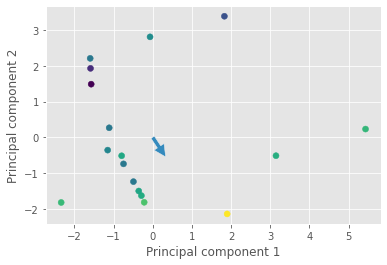

In [6]:
# Plotting principal components, colored by coalition time (on log scale). 
plt.scatter(x = X_proj[0], y = X_proj[1], c = np.log(FPP["Tcoal"]))
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")

# Creating arrow at (0,0), representing the projection of coalition time (scaled by 2). 
tcoal_proj = components["Tcoal"].to_numpy()
plt.annotate("",xy=tcoal_proj*2,xytext=(0,0),arrowprops={})
plt.show()